<a href="https://colab.research.google.com/github/wcj365/python-stats-dataviz/blob/master/text_classification_recalls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Device Recalls
https://www.analyticsvidhya.com/blog/2021/11/a-guide-to-building-an-end-to-end-multiclass-text-classification-model/

In [16]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [17]:
# loading data
data_url = "https://raw.githubusercontent.com/wcj365/python-stats-dataviz/master/data/recalls_all.csv"
df = pd.read_csv(data_url)
df.shape

(44249, 3)

In [18]:
df.head()

,event_date_initiated,root_cause_description,reason_for_recall
0,2010-03-12,Process Design,Unanticipated shut-down: A specific lot of GE...
1,2009-12-03,Device Design,"The ceramic guide rails, within the XCelerate ..."
2,2009-11-24,Component Design/Selection,Reports of difficulty in adjusting the flow ra...
3,2009-11-24,Component Design/Selection,Reports of difficulty in adjusting the flow ra...
4,2009-06-03,Other,The firm has received complaints regarding spe...


In [19]:
df = df.drop(columns=["event_date_initiated"])

df.head()

,root_cause_description,reason_for_recall
0,Process Design,Unanticipated shut-down: A specific lot of GE...
1,Device Design,"The ceramic guide rails, within the XCelerate ..."
2,Component Design/Selection,Reports of difficulty in adjusting the flow ra...
3,Component Design/Selection,Reports of difficulty in adjusting the flow ra...
4,Other,The firm has received complaints regarding spe...


In [20]:
pd.DataFrame(df.root_cause_description.unique())

,0
0,Process Design
1,Device Design
2,Component Design/Selection
3,Other
4,Nonconforming Material/Component
5,Employee Error
6,Process Control
7,Labeling Mixups/Errors
8,Equipment Maintenance
9,Packaging Design/Selection


In [21]:
df.dropna(inplace=True)

pd.DataFrame(df.root_cause_description.unique())

,0
0,Process Design
1,Device Design
2,Component Design/Selection
3,Other
4,Nonconforming Material/Component
5,Employee Error
6,Process Control
7,Labeling Mixups/Errors
8,Equipment Maintenance
9,Packaging Design/Selection


In [22]:
remove_list = ["Pending","Unknown/Undetermined By The Firm", "Other"]

df_remove = df[df["root_cause_description"].isin(remove_list)]

df_remove.head()

,root_cause_description,reason_for_recall
4,Other,The firm has received complaints regarding spe...
9,Other,Abbott has determined that there is a dependen...
13,Other,An incomplete seal on the inner pouch allows e...
14,Other,The Dental Chair lacks a valid Device History ...
17,Other,Notification to clinicians of new revision rat...


In [23]:
df_remove.shape

(12724, 2)

In [24]:
df_doc = df_exception = df[~df["root_cause_description"].isin(remove_list)]

df_doc.head()

,root_cause_description,reason_for_recall
0,Process Design,Unanticipated shut-down: A specific lot of GE...
1,Device Design,"The ceramic guide rails, within the XCelerate ..."
2,Component Design/Selection,Reports of difficulty in adjusting the flow ra...
3,Component Design/Selection,Reports of difficulty in adjusting the flow ra...
5,Component Design/Selection,Reports of difficulty in adjusting the flow ra...


In [25]:
df_doc.shape

(31514, 2)

In [26]:
pd.DataFrame(df_doc.root_cause_description.unique())

,0
0,Process Design
1,Device Design
2,Component Design/Selection
3,Nonconforming Material/Component
4,Employee Error
5,Process Control
6,Labeling Mixups/Errors
7,Equipment Maintenance
8,Packaging Design/Selection
9,Software Design


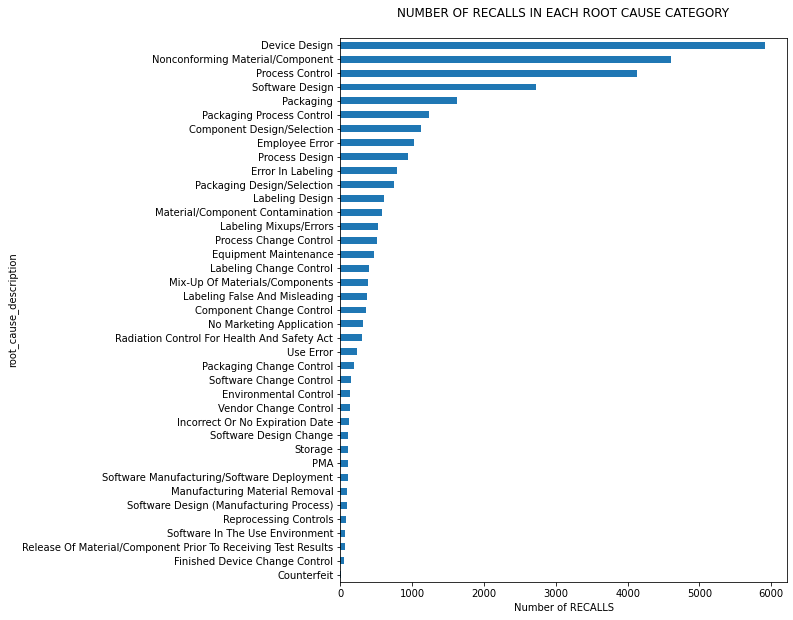

In [27]:
fig = plt.figure(figsize=(8,10))

df_doc.groupby('root_cause_description').reason_for_recall.count().sort_values().plot.barh(
    ylim=0, title= 'NUMBER OF RECALLS IN EACH ROOT CAUSE CATEGORY\n')
plt.xlabel('Number of RECALLS', fontsize = 10);

In [28]:
# Create a new column 'category_id' with encoded categories 
df_doc['category_id'] = df_doc['root_cause_description'].factorize()[0]
df_cat = df_doc[['root_cause_description', 'category_id']].drop_duplicates()

df_cat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,root_cause_description,category_id
0,Process Design,0
1,Device Design,1
2,Component Design/Selection,2
7,Nonconforming Material/Component,3
8,Employee Error,4
10,Process Control,5
12,Labeling Mixups/Errors,6
18,Equipment Maintenance,7
23,Packaging Design/Selection,8
46,Software Design,9


In [29]:
# Dictionaries for future use

cat_to_id = dict(df_cat.values)
id_to_cat = dict(df_cat[['category_id', 'root_cause_description']].values)

print(cat_to_id)

print(id_to_cat)

{'Process Design': 0, 'Device Design': 1, 'Component Design/Selection': 2, 'Nonconforming Material/Component': 3, 'Employee Error': 4, 'Process Control': 5, 'Labeling Mixups/Errors': 6, 'Equipment Maintenance': 7, 'Packaging Design/Selection': 8, 'Software Design': 9, 'Packaging': 10, 'Packaging Process Control': 11, 'PMA': 12, 'Material/Component Contamination': 13, 'Mix-Up Of Materials/Components': 14, 'Component Change Control': 15, 'Radiation Control For Health And Safety Act': 16, 'Software Design (Manufacturing Process)': 17, 'Storage': 18, 'Labeling Change Control': 19, 'Vendor Change Control': 20, 'Labeling Design': 21, 'Software Change Control': 22, 'Release Of Material/Component Prior To Receiving Test Results': 23, 'Labeling False And Misleading': 24, 'Environmental Control': 25, 'No Marketing Application': 26, 'Error In Labeling': 27, 'Packaging Change Control': 28, 'Process Change Control': 29, 'Use Error': 30, 'Software Manufacturing/Software Deployment': 31, 'Software De

In [30]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df_doc.reason_for_recall).toarray()

labels = df_doc.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 31514 complaints is represented by 26345 features (TF-IDF score of unigrams and bigrams)


In [ ]:
# Finding the three most correlated terms with each of the product categories
#N = 3
#for Product, category_id in sorted(cat_to_id.items()):
#  features_chi2 = chi2(features, labels == category_id)
#  indices = np.argsort(features_chi2[0])
#  feature_names = np.array(tfidf.get_feature_names())[indices]
#  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#  print("\n==> %s:" %(Product))
#  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
#  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

In [31]:
X = df_doc['reason_for_recall'] # Collection of documents
y = df_doc['root_cause_description'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [ ]:
models = [
#    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC()
#    MultinomialNB(),
#    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.7913,0.007234


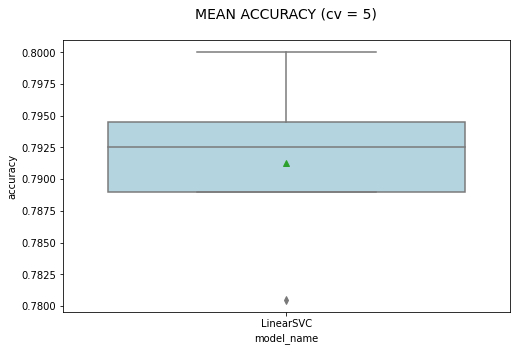

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [ ]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df2['Product'].unique()))

				CLASSIFICATIION METRICS

                                                    precision    recall  f1-score   support

                                      Student loan       0.84      0.77      0.81        83
                       Credit card or prepaid card       0.71      0.80      0.75       215
                Credit reporting, repair, or other       0.85      0.91      0.88      1153
                                   Debt collection       0.74      0.75      0.74       463
Money transfer, virtual currency, or money service       0.73      0.53      0.62        62
                           Bank account or service       0.40      0.08      0.13        51
                                          Mortgage       0.87      0.89      0.88       254
                                     Consumer Loan       0.50      0.05      0.10        19
                                   Money transfers       0.00      0.00      0.00         5
         Payday loan, title loan, or personal loan

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


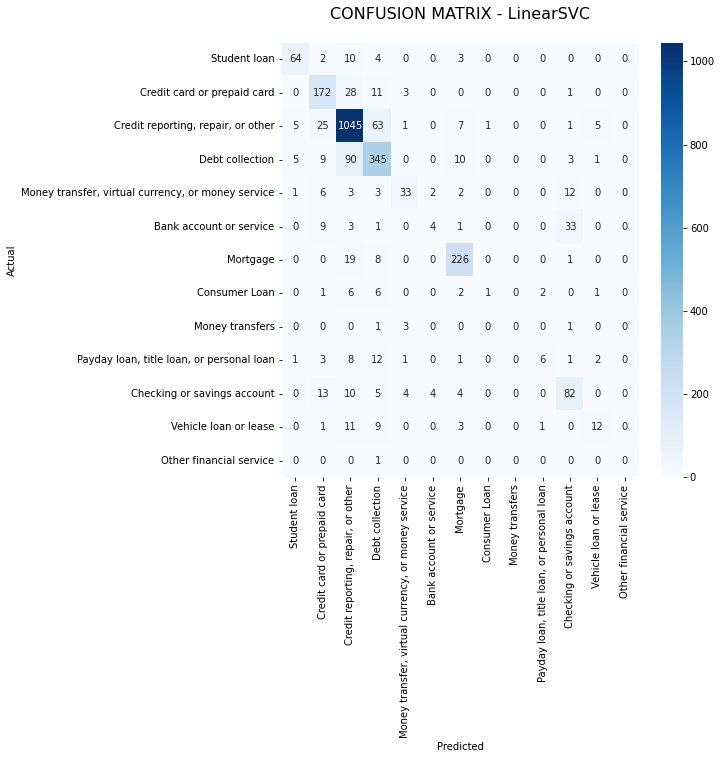

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [ ]:
complaint = """I have received over 27 emails from XXXX XXXX who is a representative from Midland Funding LLC. 
From XX/XX/XXXX I received approximately 6 emails. From XX/XX/XXXX I received approximately 6 emails. 
From XX/XX/XXXX I received approximately 9 emails. From XX/XX/XXXX I received approximately 6 emails. 
All emails came from the same individual, XXXX XXXX. It is becoming a nonstop issue of harassment."""

print(model.predict(fitted_vectorizer.transform([complaint])))

['Debt collection']


In [ ]:
complaint = """Respected Sir/ Madam, I am exploring the possibilities for financing my daughter 's 
XXXX education with private loan from bank. I am in the XXXX on XXXX visa. 
My daughter is on XXXX dependent visa. As a result, she is considered as international student. 
I am waiting in the Green Card ( Permanent Residency ) line for last several years. 

I checked with Discover, XXXX XXXX websites. While they allow international students to apply for loan, they need 
cosigners who are either US citizens or Permanent Residents. I feel that this is unfair. 
I had been given mortgage and car loans in the past which I closed successfully. I have good financial history. 
I think I should be allowed to remain cosigner on the student loan. I would be much obliged if you could look into it. 
Thanking you in advance. Best Regards"""

print(model.predict(fitted_vectorizer.transform([complaint])))

['Student loan']


In [ ]:
complaint = """They make me look like if I was behind on my Mortgage on the month of XX/XX/2018 & XX/XX/XXXX 
when I was not and never was, when I was even giving extra money to the Principal. 
The Money Source Web site and the managers started a problem, when my wife was trying to increase the payment, 
so more money went to the Principal and two payments came out that month and because 
I reverse one of them thru my Bank as Fraud they took revenge and committed slander against me by reporting me late at the Credit Bureaus, 
for 45 and 60 days, when it was not thru. Told them to correct that and the accounting department or the company revert 
that letter from going to the Credit Bureaus to correct their injustice. The manager by the name XXXX requested this for 
the second time and nothing yet. I am a Senior of XXXX years old and a Retired XXXX Veteran and is a disgraced that Americans 
treat us that way and do not want to admit their injustice and lies to the Credit Bureau."""
print(model.predict(fitted_vectorizer.transform([complaint])))

['Credit reporting, repair, or other']
